1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


True
variability  1  component:  0.9278390972512761
variability  2  component:  0.07216090274872387
variability  3  component:  6.0231938084688834e-33


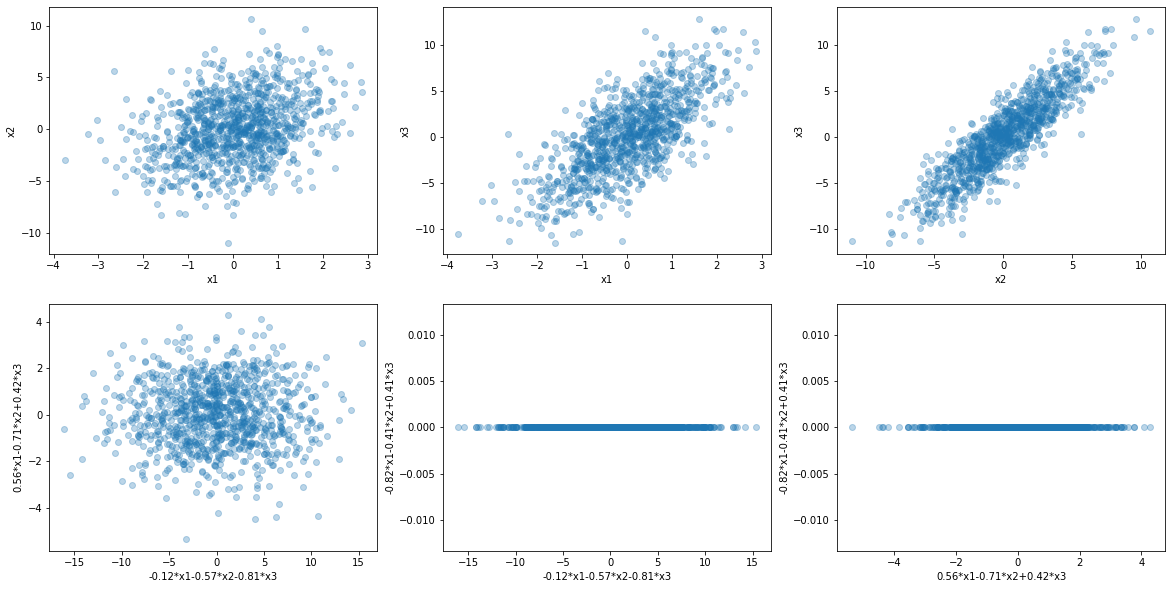

In [40]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
%matplotlib inline

N = 1000
x1 = np.random.randn(N)
x2 = np.random.randn(N)*3+x1
x3 = 2*x1+x2
data = np.array([x1, x2, x3])

l1, v1 = la.eig(np.cov(data))

U, spectrum, Vt = la.svd(data)

l2 = spectrum**2/(N-1)
v2 = U

print(np.allclose(np.sort(l1),np.sort(l2),rtol=1e-02))

for i in range(3):
    print("variability ",i+1," component: ",l2[i]/l2.sum())
    
#the results make sense because x3 is a function of x1 and x2 while x2 is a function of x1 and a non-correlated
#normal distribution. The variability related to the third feature, which is completely correlated to the first two,
#is negligible

rotated = np.dot(v2.T, data)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(2, 3, 1)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.scatter(data[0], data[1], alpha=0.3)
ax = fig.add_subplot(2, 3, 2)
ax.set_xlabel("x1")
ax.set_ylabel("x3")
plt.scatter(data[0], data[2], alpha=0.3)
ax = fig.add_subplot(2, 3, 3)
ax.set_xlabel("x2")
ax.set_ylabel("x3")
plt.scatter(data[1], data[2], alpha=0.3)
ax = fig.add_subplot(2, 3, 4)
ax.set_xlabel(str(round(v2[0][0], 2))+"*x1"+str(round(v2[1][0], 2))+"*x2"+str(round(v2[2][0], 2))+"*x3")
ax.set_ylabel(str(round(v2[0][1], 2))+"*x1"+str(round(v2[1][1], 2))+"*x2+"+str(round(v2[2][1], 2))+"*x3")
plt.scatter(rotated[0], rotated[1], alpha=0.3)
ax = fig.add_subplot(2, 3, 5)
ax.set_xlabel(str(round(v2[0][0], 2))+"*x1"+str(round(v2[1][0], 2))+"*x2"+str(round(v2[2][0], 2))+"*x3")
ax.set_ylabel(str(round(v2[0][2], 2))+"*x1"+str(round(v2[1][2], 2))+"*x2+"+str(round(v2[2][2], 2))+"*x3")
plt.scatter(rotated[0], rotated[2], alpha=0.3)
ax = fig.add_subplot(2, 3, 6)
ax.set_xlabel(str(round(v2[0][1], 2))+"*x1"+str(round(v2[1][1], 2))+"*x2+"+str(round(v2[2][1], 2))+"*x3")
ax.set_ylabel(str(round(v2[0][2], 2))+"*x1"+str(round(v2[1][2], 2))+"*x2+"+str(round(v2[2][2], 2))+"*x3")
plt.scatter(rotated[1], rotated[2], alpha=0.3)

plt.show()

#as expected from the dataset definition the points are displaced on a plane and not a generic 3D region

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

variability  1  component:  0.9277067497090496
variability  2  component:  0.07215067813241384
variability  3  component:  1.7162730501984423e-05
variability  4  component:  1.6286510655425822e-05
variability  5  component:  1.522266692984881e-05
variability  6  component:  1.4769668783371451e-05
variability  7  component:  1.4697643341640403e-05
variability  8  component:  1.4026307559511119e-05
variability  9  component:  1.3262035162641415e-05
variability  10  component:  1.2524213487293079e-05
variability  11  component:  1.2341949258338744e-05
variability  12  component:  1.2278432856139202e-05
variability  13  component:  5.901834920456201e-33


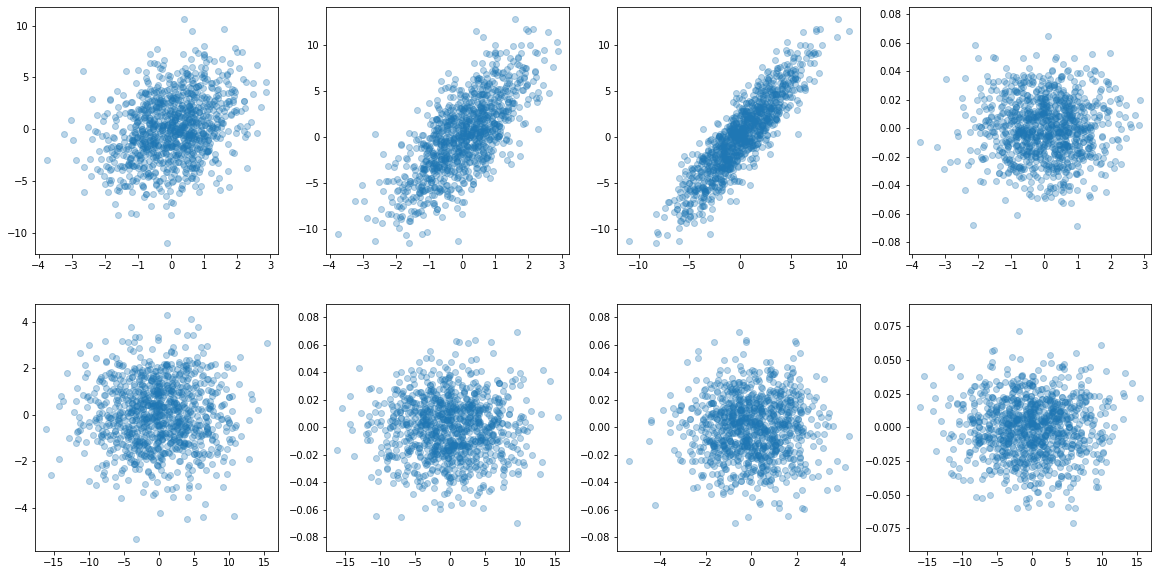

In [62]:
noise = [x1, x2, x3]
for i in range(10):
    noise.append(np.random.randn(N)*0.02)

data = np.array(noise)

U, spectrum, Vt = la.svd(data)
l = spectrum**2/(N-1)
v = U

for i in range(13):
    print("variability ",i+1," component: ",l[i]/l.sum())

rotated = np.dot(v.T, data)

fig = plt.figure(figsize=(20, 10))

fig.add_subplot(2, 4, 1)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.scatter(data[0], data[1], alpha=0.3)

fig.add_subplot(2, 4, 2)
ax.set_xlabel("x1")
ax.set_ylabel("x3")
plt.scatter(data[0], data[2], alpha=0.3)

fig.add_subplot(2, 4, 3)
ax.set_xlabel("x2")
ax.set_ylabel("x3")
plt.scatter(data[1], data[2], alpha=0.3)

fig.add_subplot(2, 4, 4)
ax.set_xlabel("x1")
ax.set_ylabel("noise 1")
plt.scatter(data[0], data[3], alpha=0.3)

#I'm showing only one example of noise given the fact that all noise features are not correlated to any of the
#other features so the appearance of the plot is qualitatively the same

fig.add_subplot(2, 4, 5)
plt.scatter(rotated[0], rotated[1], alpha=0.3)

fig.add_subplot(2, 4, 6)
plt.scatter(rotated[0], rotated[2], alpha=0.3)

fig.add_subplot(2, 4, 7)
plt.scatter(rotated[1], rotated[2], alpha=0.3)

fig.add_subplot(2, 4, 8)
plt.scatter(rotated[0], rotated[3], alpha=0.3)

plt.show()

#the result is almost (relatively) bidimensional as before, given the small variability of noise

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


variability  1  component:  0.9988444090767308
variability  2  component:  0.0010765023702586783
variability  3  component:  7.908855301051729e-05
variability  4  component:  4.1939735223081395e-33
variability  5  component:  9.599022147520231e-34
variability  6  component:  5.829566132437516e-34
variability  7  component:  4.068228941037851e-34
variability  8  component:  3.0426964411076933e-34
variability  9  component:  1.7836252656179796e-34
variability  10  component:  1.1857466658733767e-34


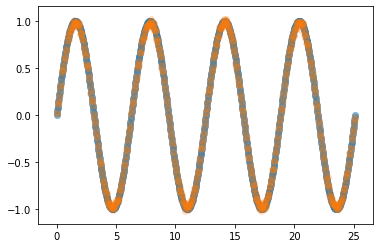

In [88]:
time = np.linspace(0, 8*np.pi, N)
n = 10

x = np.sin(time)
y = np.random.randn(N)*0.02
z = np.random.randn(N)*0.02
original = np.array([x, y, z])

cam_rotation = np.random.rand(n, 3)
cam = np.dot(cam_rotation, original)

U, spectrum, Vt = la.svd(cam)
l = spectrum**2/(N-1)
v = U

for i in range(n):
    print("variability ",i+1," component: ",l[i]/l.sum())

rotated = np.dot(v.T, cam)

plt.scatter(time, x, alpha=0.5)
plt.scatter(time, rotated[0]*(original[0]/rotated[0]).mean(), alpha=0.2)

plt.show()

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

gamma:
variability  1  component:  0.9988444090767308
variability  2  component:  0.0010765023702586783
variability  3  component:  7.908855301051729e-05
variability  4  component:  4.1939735223081395e-33
variability  5  component:  9.599022147520231e-34
variability  6  component:  5.829566132437516e-34
variability  7  component:  4.068228941037851e-34
variability  8  component:  3.0426964411076933e-34
variability  9  component:  1.7836252656179796e-34
variability  10  component:  1.1857466658733767e-34
hadron:
variability  1  component:  0.9988444090767308
variability  2  component:  0.0010765023702586783
variability  3  component:  7.908855301051729e-05
variability  4  component:  4.1939735223081395e-33
variability  5  component:  9.599022147520231e-34
variability  6  component:  5.829566132437516e-34
variability  7  component:  4.068228941037851e-34
variability  8  component:  3.0426964411076933e-34
variability  9  component:  1.7836252656179796e-34
variability  10  component:  1.18

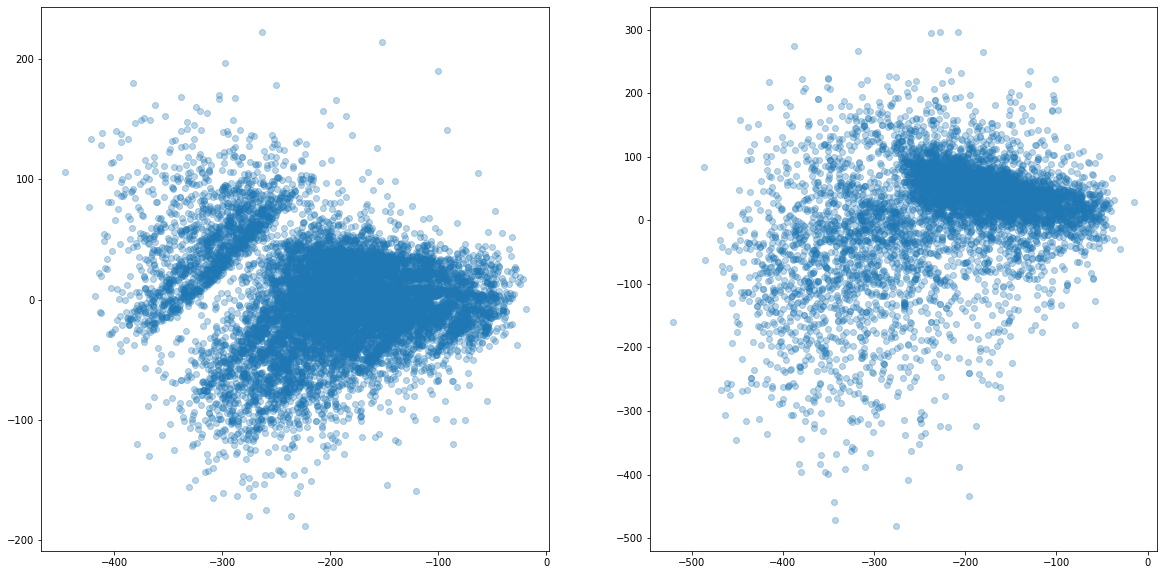

In [126]:
import pandas as pd

magic = pd.read_csv("magic04.data", header=None)
gamma = magic[magic[10] =='g'].drop(columns=[10]).values
hadron = magic[magic[10] =='h'].drop(columns=[10]).values

U, spectrum, Vt = la.svd(gamma.T)
lg = spectrum**2/(len(gamma.T[0])-1)
vg = U

U, spectrum, Vt = la.svd(hadron.T)
lh = spectrum**2/(len(hadron.T[0])-1)
vh = U

print("gamma:")
for i in range(len(gamma[0])):
    print("variability ",i+1," component: ",l[i]/l.sum())
    
print("hadron:")
for i in range(len(hadron[0])):
    print("variability ",i+1," component: ",l[i]/l.sum())

#almost 100% of variability is in two features
    
gammaR = np.dot(vg.T, gamma.T)
hadronR = np.dot(vh.T, hadron.T)

fig = plt.figure(figsize=(20, 10))

fig.add_subplot(1, 2, 1)
plt.scatter(gammaR[0], gammaR[1], alpha=0.3)

fig.add_subplot(1, 2, 2)
plt.scatter(hadronR[0], hadronR[1], alpha=0.3)

plt.show()